# **Phase 2:**

## **Phase Introduction**

This notebook documents the Exploratory Data Analysis (EDA) and data cleaning process for the integrated dataset. The primary objectives of this phase are:

1. **Initial Data Inspection** – Understanding the structure, completeness, and potential issues in the dataset.  
2. **Exploratory Data Analysis (EDA)** – Identifying patterns, trends, and anomalies through statistical summaries and visualizations.  
3. **Data Cleaning & Preprocessing** – Handling missing values, duplicates, and irrelevant features, as well as normalizing or transforming data where necessary.  
4. **Comparison of Primary and Secondary Data** – Evaluating similarities, differences, and potential biases between the two sources.  

Each step is carefully documented, including the rationale behind data processing decisions, challenges encountered, and key findings. The insights gained will help guide further analysis and hypothesis development.  

### Encode Qualitative Data for EDA

During the Exploratory Data Analysis (EDA) phase of this project, one of the key decisions we made was to **not encode qualitative data** such as **ISO codes**, **disaster group types**, and similar categorical features. This decision was made for several reasons, primarily focused on the **readability** and **interpretability** of the analysis during this early stage.

#### 1. **Enhanced Readability of the Outcome**

The main reason we chose not to encode these qualitative attributes in the initial analysis was to maintain the **readability** of the dataset and its outcomes. For example:
- **ISO codes** and **disaster group types** are inherently categorical and often represent meaningful information (such as country codes or disaster classifications).
- Encoding them into numeric  might obscure the meaning of these features in the dataset, making it harder to interpret the results during EDA.
  
By keeping these qualitative variables in their original format (e.g., as text or labels), it was easier to:
  - Understand the distribution of disasters across countries and disaster groups.
  - Perform frequency analysis or count plots without additional preprocessing steps.
  - Quickly identify any patterns or anomalies in the data related to specific categories.

#### 2. **Initial Focus on Data Exploration**

At the stage of EDA, the primary goal is to **explore** and **understand** the data. Encoding qualitative data can be useful for machine learning models or statistical analyses later on, but in the early phases of EDA, we wanted to:
  - **Explore the relationships** between variables without the complexity of encoded values.
  - **Visualize the distributions** and frequency counts of categorical variables in their raw form, which was more informative and straightforward.
  


---

# EDA on Primary Dataset (API)

In [1]:
import pandas as pd

# Load the dataset
file_path = "RawData/gdacs_disasters.csv"
df = pd.read_csv(file_path)

print("Dataset Information:\n")
df.info()

# Display first few rows
print("\nFirst 5 rows:\n")
print(df.head())

# Display summary statistics
print("\nSummary Statistics:\n")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Check column names
print("\nColumn Names:\n")
print(df.columns)


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Event Name      20 non-null     object 
 1   Country         91 non-null     object 
 2   ISO             90 non-null     object 
 3   Disaster Group  100 non-null    object 
 4   Latitude        100 non-null    float64
 5   Longitude       100 non-null    float64
 6   Start Year      100 non-null    int64  
 7   Start Month     100 non-null    int64  
 8   Start Day       100 non-null    int64  
 9   End Year        100 non-null    int64  
 10  End Month       100 non-null    int64  
 11  End Day         100 non-null    int64  
 12  Magnitude       100 non-null    float64
 13  Magnitude Unit  96 non-null     object 
 14  Losses          0 non-null      float64
dtypes: float64(4), int64(6), object(5)
memory usage: 11.8+ KB

First 5 rows:

  Event Name                  

In [2]:
import pandas as pd

# Load the dataset
file_path = "RawData/gdacs_disasters.csv"
df = pd.read_csv(file_path)

# Data Cleaning
# Drop the 'Losses' column as it contains no data
df.drop(columns=['Losses'], inplace=True)

# Drop rows where both 'Country' and 'ISO' are NaN
df = df[~df[['Country', 'ISO']].isnull().all(axis=1)]

# Display basic information
print("Dataset Information after Cleaning:\n")
df.info()

# Display first few rows
print("\nFirst 5 rows after Cleaning:\n")
print(df.head())

# Display summary statistics
print("\nSummary Statistics after Cleaning:\n")
print(df.describe(include='all'))

# Check for remaining missing values
print("\nMissing Values after Cleaning:\n")
print(df.isnull().sum())

# Check column names
print("\nColumn Names:\n")
print(df.columns)

df.to_csv("Datasets/api_dataset.csv", index=False)


Dataset Information after Cleaning:

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Event Name      19 non-null     object 
 1   Country         91 non-null     object 
 2   ISO             90 non-null     object 
 3   Disaster Group  91 non-null     object 
 4   Latitude        91 non-null     float64
 5   Longitude       91 non-null     float64
 6   Start Year      91 non-null     int64  
 7   Start Month     91 non-null     int64  
 8   Start Day       91 non-null     int64  
 9   End Year        91 non-null     int64  
 10  End Month       91 non-null     int64  
 11  End Day         91 non-null     int64  
 12  Magnitude       91 non-null     float64
 13  Magnitude Unit  87 non-null     object 
dtypes: float64(3), int64(6), object(5)
memory usage: 10.7+ KB

First 5 rows after Cleaning:

  Event Name                  Country  ISO Disaster

From the dataset exploration, we observed that **EQ (Earthquake)** is the most frequent disaster type, followed by **WF (Wildfire)**.



Disaster Subgroups by ISO:

   Disaster Group  ISO  Count
0              DR  AGO      1
1              DR  ARG      1
2              DR  BGR      1
3              DR  BLR      1
4              DR  BOL      1
5              DR  BRA      1
6              DR  CAN      1
7              DR  CHN      1
8              DR  CMR      1
9              DR  DZA      1
10             DR  GIN      1
11             DR  HUN      1
12             DR  IRL      1
13             DR  ISR      1
14             DR  MDG      1
15             DR  MEX      1
16             DR  USA      1
17             EQ  CCK      1
18             EQ  CHL      3
19             EQ  CHN      1
20             EQ  COL      1
21             EQ  ECU      1
22             EQ  ETH      2
23             EQ  FJI      1
24             EQ  GRC     11
25             EQ  GTM      1
26             EQ  IDN      5
27             EQ  ITA      1
28             EQ  JPN      2
29             EQ  PER      1
30             EQ  PNG      2
31         

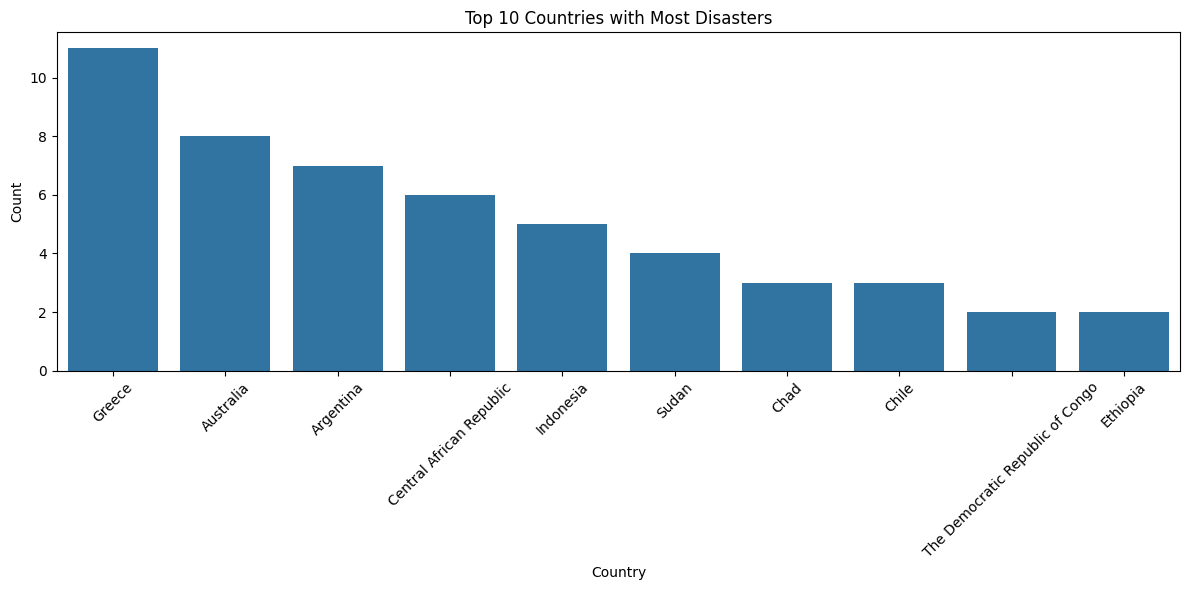

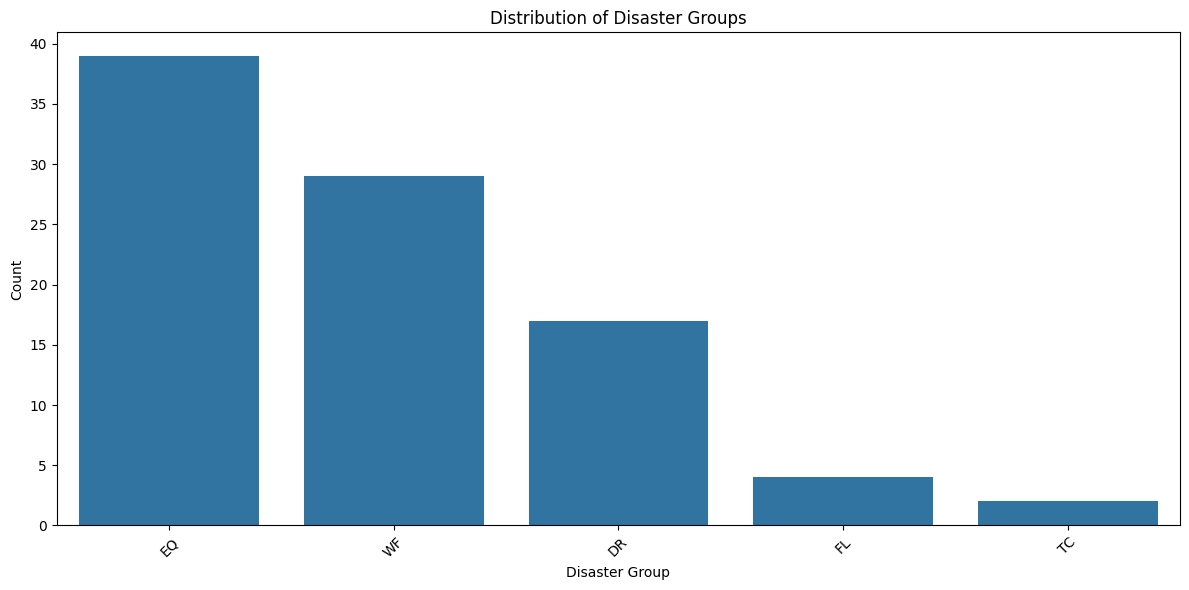

EDA saved to EDA/api_disaster_by_country.png
Country disaster analysis saved to EDA/api_country_disasters.png


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Datasets/api_dataset.csv"
df = pd.read_csv(file_path)

# Explore disaster subgroups with ISO
if 'Disaster Group' in df.columns and 'ISO' in df.columns:
    disaster_subgroups = df.groupby(['Disaster Group', 'ISO']).size().reset_index(name='Count')
    print("\nDisaster Subgroups by ISO:\n")
    print(disaster_subgroups)
    
    # Save the disaster subgroups data
    disaster_subgroups.to_csv("Datasets/disaster_subgroups.csv", index=False)

# Explore countries with the most disasters
if 'Country' in df.columns:
    country_disasters = df['Country'].value_counts().reset_index()
    country_disasters.columns = ['Country', 'Count']
    print("\nCountries with Most Disasters:\n")
    print(country_disasters)
    
    # Save the country disaster data
    country_disasters.to_csv("Datasets/country_disasters.csv", index=False)
    
    # Plot the top 10 countries with the most disasters
    eda_output_path_countries = "EDA/api_country_disasters.png"
    plt.figure(figsize=(12, 6))
    sns.barplot(data=country_disasters.head(10), x='Country', y='Count')
    plt.xticks(rotation=45)
    plt.title("Top 10 Countries with Most Disasters")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(eda_output_path_countries)
    plt.show()

# Perform EDA
eda_output_path = "EDA/api_disaster_by_country.png"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disaster Group', order=df['Disaster Group'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Disaster Groups")
plt.xlabel("Disaster Group")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(eda_output_path)
plt.show()


print(f"EDA saved to {eda_output_path}")
print(f"Country disaster analysis saved to {eda_output_path_countries}")


Countries with the most occurance in diasters are Greece followed by Australia and Argentina 

From the dataset exploration, we observed that **EQ (Earthquake)** is the most frequent disaster type, followed by **WF (Wildfire)**.



Disaster Groups by Continent:

  Disaster Group      Continent  Count
0             DR           Asia      1
1             DR  North America      3
2             DR  South America      2
3             EQ           Asia      8
4             EQ         Europe      1
5             EQ  North America      1
6             EQ  South America      1
7             FL  South America      1
8             WF        Oceania      8
9             WF  South America      5


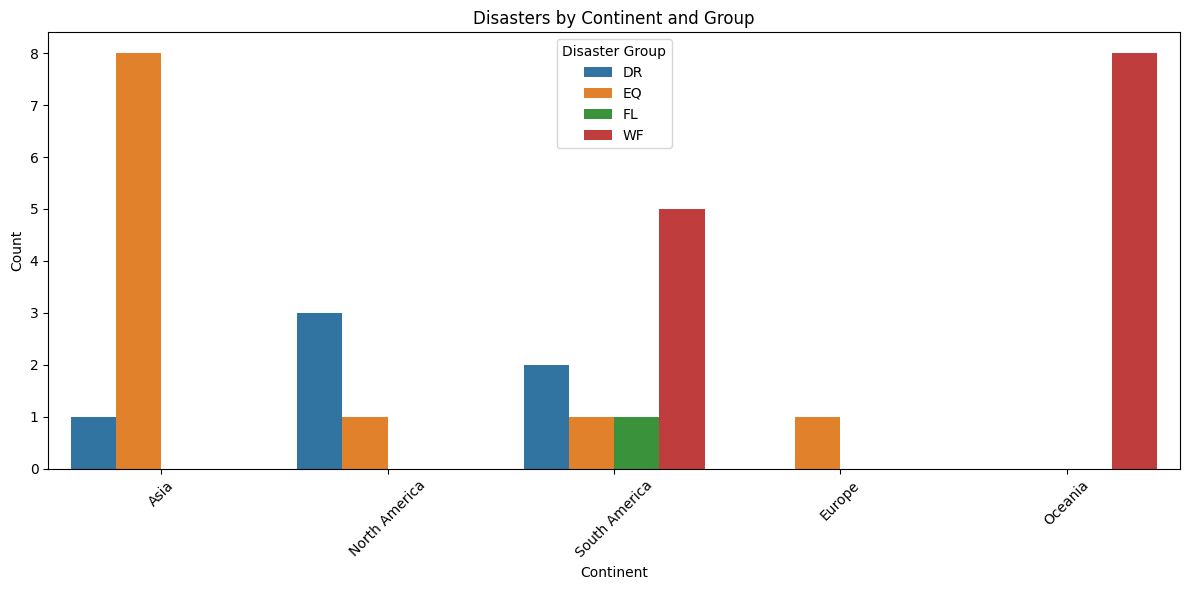

Continent disaster analysis saved to EDA/api_disaster_by_continent.png


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Datasets/api_dataset.csv"
df = pd.read_csv(file_path)

# Mapping countries to continents
continent_map = {
    "North America": ["USA", "CAN", "MEX"],
    "South America": ["BRA", "ARG", "COL"],
    "Europe": ["FRA", "DEU", "GBR", "ITA", "ESP"],
    "Africa": ["NGA", "EGY", "ZAF"],
    "Asia": ["CHN", "IND", "JPN", "IDN"],
    "Oceania": ["AUS", "NZL"]
}

# Create a reverse lookup dictionary
continent_lookup = {iso: continent for continent, isos in continent_map.items() for iso in isos}

# Assign continent based on ISO code
df["Continent"] = df["ISO"].map(continent_lookup)

# Explore disaster groups by continent
if 'Disaster Group' in df.columns and 'Continent' in df.columns:
    disaster_continent = df.groupby(['Disaster Group', 'Continent']).size().reset_index(name='Count')
    print("\nDisaster Groups by Continent:\n")
    print(disaster_continent)
    
    # Save disaster groups by continent
    disaster_continent.to_csv("Datasets/disaster_continent.csv", index=False)
    
    # Plot disasters by continent
    eda_output_path_continent = "EDA/api_disaster_by_continent.png"
    plt.figure(figsize=(12, 6))
    sns.barplot(data=disaster_continent, x='Continent', y='Count', hue='Disaster Group')
    plt.xticks(rotation=45)
    plt.title("Disasters by Continent and Group")
    plt.xlabel("Continent")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(eda_output_path_continent)
    plt.show()

print(f"Continent disaster analysis saved to {eda_output_path_continent}")



- **Wildfires (WF) occur most frequently in Oceania**, followed by South America indicating a significant climate-driven disaster pattern in the region.
- **Earthquakes (EQ) are most prevalent in Asia**, highlighting the region’s vulnerability to seismic activity.
- Other disaster groups show less occurrences across continents, but these two stand out as the most frequent occurrences.


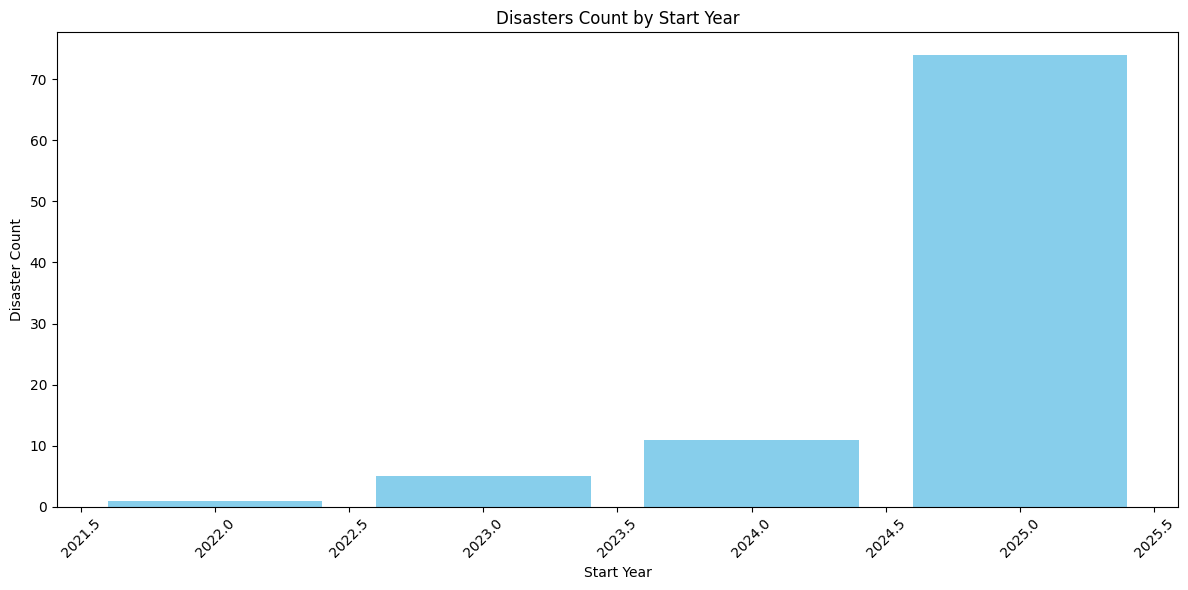

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "Datasets/api_dataset.csv"
df = pd.read_csv(file_path)

# Count disasters per start year
if 'Start Year' in df.columns:
    start_year_counts = df['Start Year'].value_counts().reset_index()
    start_year_counts.columns = ['Start Year', 'Count']

    # Plot and save as PNG
    plt.figure(figsize=(12, 6))
    plt.bar(start_year_counts['Start Year'], start_year_counts['Count'], color='skyblue')
    plt.xlabel("Start Year")
    plt.ylabel("Disaster Count")
    plt.title("Disasters Count by Start Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("EDA/api_disasters_by_start_year.png")
    plt.show()
    plt.close()



# EDA on Secondary Data

In [ ]:
import pandas as pd

# Load the dataset
file_path = "RawData/emdat.csv"
df = pd.read_csv(file_path)


# Drop rows where both 'Country' and 'ISO' are NaN
df = df[~df[['Country', 'ISO']].isnull().all(axis=1)]

# Display basic information
print("Dataset Information after Cleaning:\n")
df.info()

# Display first few rows
print("\nFirst 5 rows after Cleaning:\n")
print(df.head())

# Display summary statistics
print("\nSummary Statistics after Cleaning:\n")
print(df.describe(include='all'))

# Check for remaining missing values
print("\nMissing Values after Cleaning:\n")
print(df.isnull().sum())

# Check column names
print("\nColumn Names:\n")
print(df.columns)

df.to_csv("Datasets/api_dataset.csv", index=False)


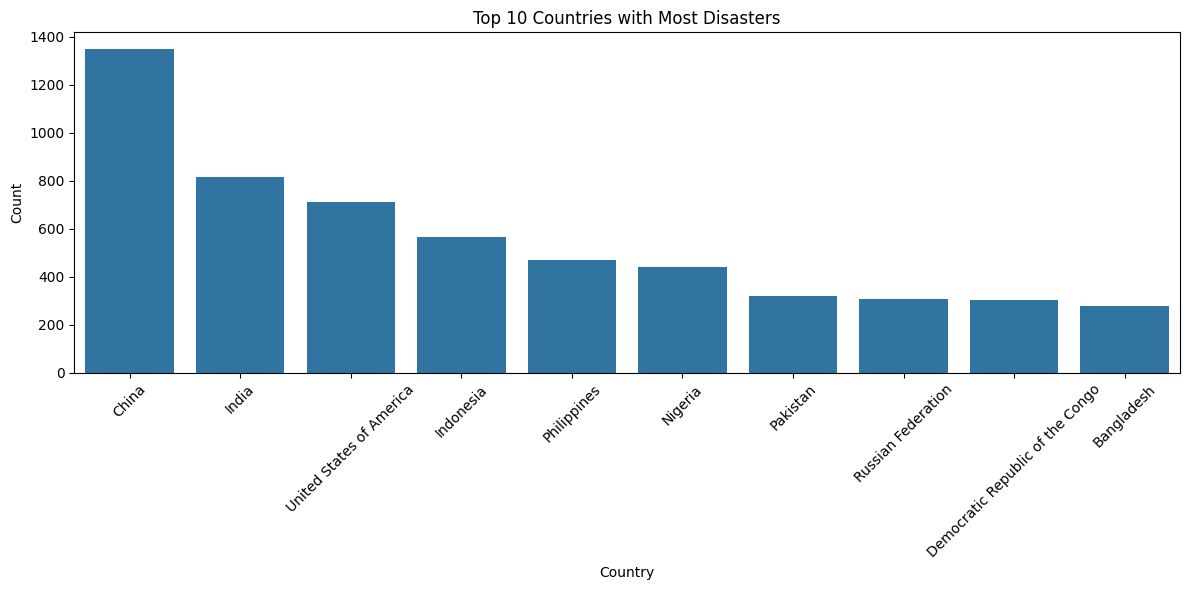

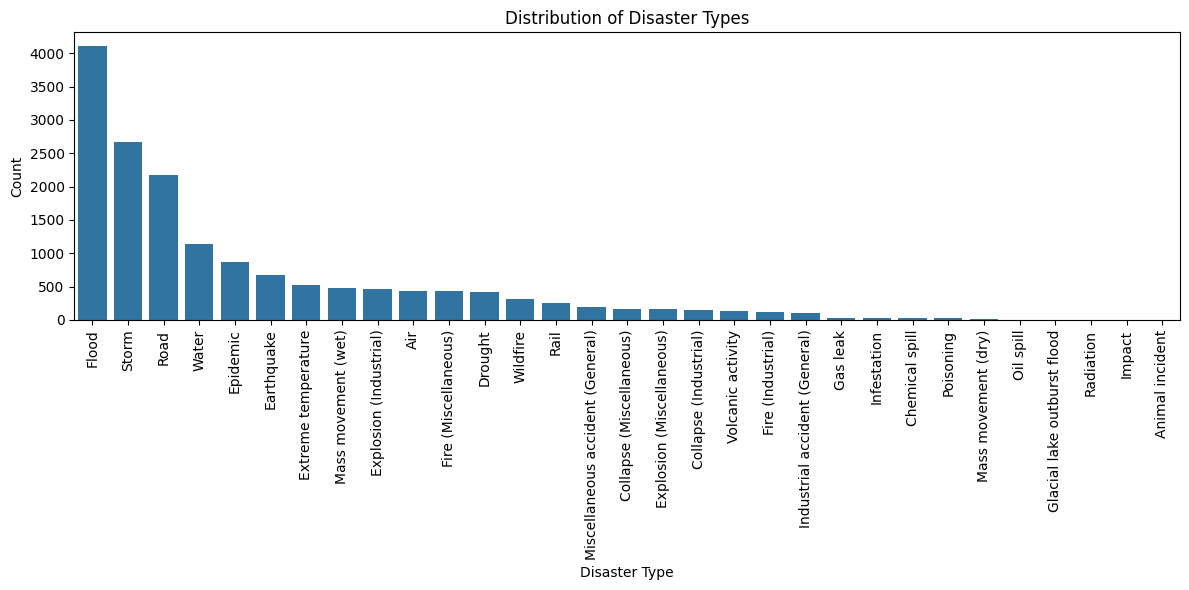

EDA saved to EDA/emdat_disaster_by_country.png
Country disaster analysis saved to EDA/emdat_country_disasters.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "RawData/emdat.csv"
df = pd.read_csv(file_path)

# Explore disaster subgroups with ISO
if 'Disaster Group' in df.columns and 'ISO' in df.columns:
    disaster_subgroups = df.groupby(['Disaster Group', 'ISO']).size().reset_index(name='Count')
    
    # Save the disaster subgroups data
    disaster_subgroups.to_csv("Datasets/disaster_subgroups.csv", index=False)

# Explore countries with the most disasters
if 'Country' in df.columns:
    country_disasters = df['Country'].value_counts().reset_index()
    country_disasters.columns = ['Country', 'Count']
    
    # Save the country disaster data
    country_disasters.to_csv("Datasets/country_disasters.csv", index=False)
    
    # Plot the top 10 countries with the most disasters
    eda_output_path_countries = "EDA/emdat_country_disasters.png"
    plt.figure(figsize=(12, 6))
    sns.barplot(data=country_disasters.head(10), x='Country', y='Count')
    plt.xticks(rotation=45)
    plt.title("Top 10 Countries with Most Disasters")
    plt.xlabel("Country")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(eda_output_path_countries)
    plt.show()

# Perform EDA
eda_output_path = "EDA/emdat_disaster_by_country.png"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Disaster Type', order=df['Disaster Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(eda_output_path)
plt.show()

print(f"EDA saved to {eda_output_path}")
print(f"Country disaster analysis saved to {eda_output_path_countries}")

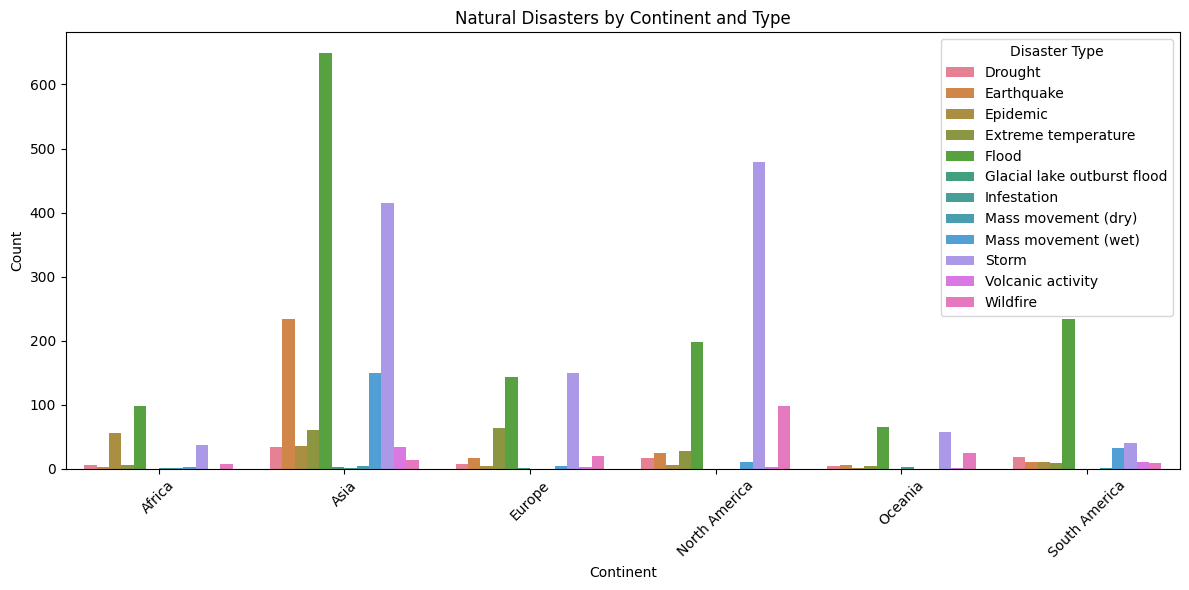

Continent disaster analysis saved to EDA/emdat_disasters_by_continent.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "RawData/emdat.csv"
df = pd.read_csv(file_path)

# Mapping countries to continents
continent_map = {
    "North America": ["USA", "CAN", "MEX"],
    "South America": ["BRA", "ARG", "COL"],
    "Europe": ["FRA", "DEU", "GBR", "ITA", "ESP"],
    "Africa": ["NGA", "EGY", "ZAF"],
    "Asia": ["CHN", "IND", "JPN", "IDN"],
    "Oceania": ["AUS", "NZL"]
}

# Create a reverse lookup dictionary
continent_lookup = {iso: continent for continent, isos in continent_map.items() for iso in isos}

# Assign continent based on ISO code
if 'ISO' in df.columns:
    df["Continent"] = df["ISO"].map(continent_lookup)

# Filter for only natural disasters
if 'Disaster Group' in df.columns:
    df = df[df['Disaster Group'] == 'Natural']

# Explore disaster types by continent
if 'Disaster Type' in df.columns and 'Continent' in df.columns:
    disaster_continent = df.groupby(['Disaster Type', 'Continent']).size().reset_index(name='Count')
    
    # Save disaster types by continent
    disaster_continent.to_csv("Datasets/disaster_continent.csv", index=False)
    
    # Plot disaster types by continent
    plt.figure(figsize=(12, 6))
    sns.barplot(data=disaster_continent, x='Continent', y='Count', hue='Disaster Type')
    plt.xticks(rotation=45)
    plt.title("Natural Disasters by Continent and Type")
    plt.xlabel("Continent")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig("EDA/emdat_disasters_by_continent.png")
    plt.show()

print("Continent disaster analysis saved to EDA/emdat_disasters_by_continent.png")


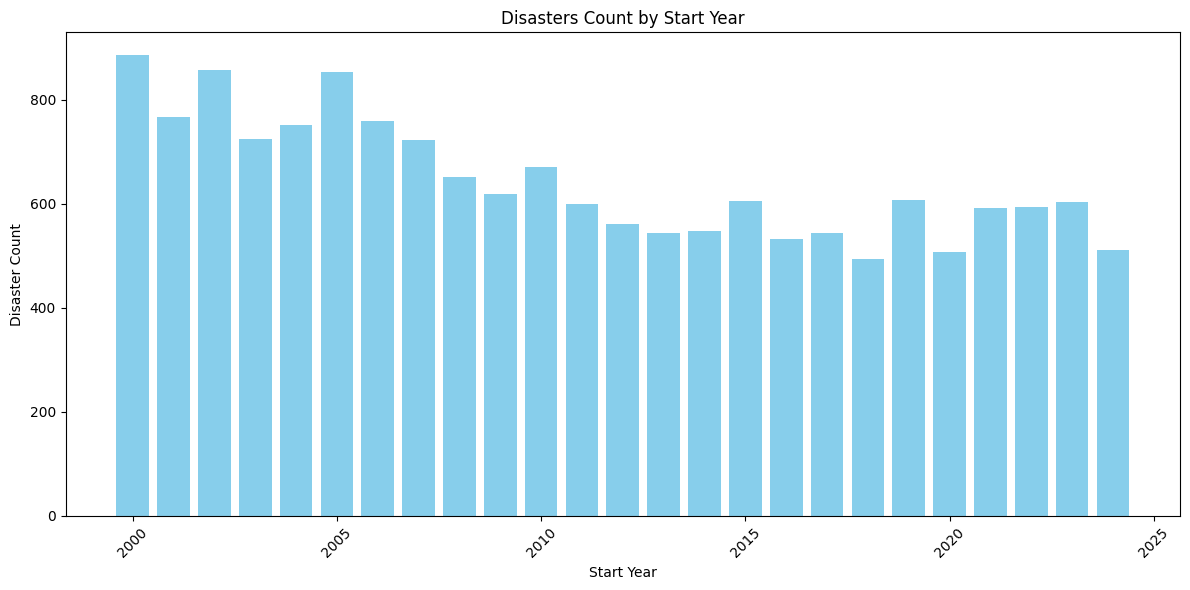

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "RawData/emdat.csv"
df = pd.read_csv(file_path)

# Count disasters per start year
if 'Start Year' in df.columns:
    start_year_counts = df['Start Year'].value_counts().reset_index()
    start_year_counts.columns = ['Start Year', 'Count']

    # Plot and save as PNG
    plt.figure(figsize=(12, 6))
    plt.bar(start_year_counts['Start Year'], start_year_counts['Count'], color='skyblue')
    plt.xlabel("Start Year")
    plt.ylabel("Disaster Count")
    plt.title("Disasters Count by Start Year")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("EDA/emdat_disasters_by_start_year.png")
    plt.show()
    plt.close()


## Data Comparison and EDA Approach  

Upon comparing the **primary dataset** with the **secondary dataset**, we observed a significant difference in the **number of rows, attributes, and overall structure**. To ensure a **comprehensive analysis**, we proceeded with **EDA on both datasets** to extract key insights and compare them effectively.  

However, for a more **unified and enriched analysis**, we integrated both datasets into a single **combined dataset**. This allowed us to capture a broader perspective while maintaining consistency in our exploration. The EDA was then primarily focused on the **integrated dataset**, ensuring that all relevant patterns and trends were thoroughly examined.  


# EDA Comparison: Primary vs. Secondary Data

## Investigation Notes
- **Row Count**: Secondary data has **16,000+ rows**, while primary data (collected via API) has **fewer than 100**.
- **Disaster Count**: Secondary records **over 10 disaster types**, whereas primary has **only 5 types**.
- **Time Period**:  
  - Primary data records disasters **from 2020 onward** (recent events).  
  - Secondary data covers disasters **from the 1900s onward** (historical perspective).  
- **Terminology Differences**: Disaster names differed between datasets (e.g., "EQ" in primary corresponds to "Earthquake" in secondary).  
- **Categorical Data**: Since disaster types are categorical, we couldn't compare means, so we analyzed **modes (most frequent occurrences).**  

## Comparison Table

| Aspect                     | Primary Data (API)                           | Secondary Data (Historical)                  |
|----------------------------|----------------------------------------------|----------------------------------------------|
| **Row Count**              | <100                                         | 16,000+                                     |
| **Disaster Count**         | 5 disaster types                            | Over 10 disaster types                     |
| **Time Period**            | 2020 and later                              | 1900s and later                             |
| **Most Affected Country**  | Greece (10 disasters)                        | China (1,200+ disasters)                    |
| **Most Frequent Disaster** | Varies by country; Asia → Earthquakes, Oceania → Wildfires | Asia → **Floods** (most frequent overall)   |
| **Disaster Type Mapping**  | Limited to **news-reported disasters**       | Covers a **wider variety** of disasters     |

## Key Observations
- **Primary data aligns with recent media coverage**, highlighting major newsworthy disasters.  
- **Secondary data provides historical trends** and a **wider range of disasters** over time.  
- **Asia has the most disasters in both datasets,** but secondary data highlights **floods** as the most frequent.  
- **Oceania (primary) sees mostly wildfires,** while secondary shows **more disaster diversity.**  
- **Republic of Congo appears in the top 10 countries with the most disasters** in both primary and secondary datasets, indicating a consistently high disaster occurrence.  


---


# EDA on Integrated Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("Datasets/integrated.csv")  
print(df.info())  
print(df.head())  
print(df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disaster Group            32319 non-null  object 
 1   Disaster Subgroup         32319 non-null  object 
 2   Disaster Type             32319 non-null  object 
 3   ISO                       32309 non-null  object 
 4   Latitude                  4648 non-null   object 
 5   Longitude                 4651 non-null   object 
 6   Start Year                32319 non-null  int64  
 7   Start Month               31864 non-null  float64
 8   Start Day                 27129 non-null  float64
 9   End Year                  32319 non-null  int64  
 10  End Month                 31449 non-null  float64
 11  End Day                   27264 non-null  float64
 12  Total Deaths              24343 non-null  float64
 13  No. Injured               9848 non-null   float64
 14  No. Af

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Datasets/integrated.csv")  # Modify path if needed

# Initial inspection
print("Dataset Info:\n")
print(df.info())

print("\nFirst Five Rows:\n")
print(df.head())

print("\nSummary Statistics:\n")
print(df.describe())

print("\nMissing Values:\n")
print(df.isnull().sum())

print("\nDuplicate Records:", df.duplicated().sum())

print("\nData Types:\n")
print(df.dtypes)

print("\nFeature Relevance Check:\n")
print(df.nunique())  # Shows unique values per column to check for low-variance features


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32319 entries, 0 to 32318
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disaster Group            32319 non-null  object 
 1   Disaster Subgroup         32319 non-null  object 
 2   Disaster Type             32319 non-null  object 
 3   ISO                       32309 non-null  object 
 4   Latitude                  4648 non-null   object 
 5   Longitude                 4651 non-null   object 
 6   Start Year                32319 non-null  int64  
 7   Start Month               31864 non-null  float64
 8   Start Day                 27129 non-null  float64
 9   End Year                  32319 non-null  int64  
 10  End Month                 31449 non-null  float64
 11  End Day                   27264 non-null  float64
 12  Total Deaths              24343 non-null  float64
 13  No. Injured               9848 non-null   floa

## Potential issues

### Data Integration and Handling Missing Values

In this project, we began by integrating data from various sources to create a comprehensive dataset. The dataset includes several attributes such as ISO codes, geographical coordinates (latitude and longitude), event dates, and disaster-related metrics like deaths, injuries, affected populations, and financial damages. The primary goal of this integration was to collect as many rows as possible to enrich the data and ensure a broad dataset for analysis. This process enabled us to gather extensive data that would be beneficial for understanding the patterns and impacts of disasters.

#### Challenges with Missing Values

However, during the integration process, we encountered several challenges, particularly with missing values across various attributes. For example:
- **Latitude** (4648 non-null entries)
- **Longitude** (4651 non-null entries)
- **No. Injured, No. Affected, No. Homeless, Total Damages ('000 US$)** (a significant number of null values)

These missing values raised concerns about data completeness and accuracy. Dropping entire rows with null values in multiple columns would lead to losing valuable insights, especially from columns with fewer null values. As a result, we made the decision not to drop the rows entirely, as they still contained important information in other columns.

#### Strategy: Splitting Data Based on Relevance

To address this issue, we decided to **split the data according to the columns that were most relevant to our research questions**. By focusing on subsets of data that had minimal missing values in the critical columns, we were able to work with cleaner datasets that maintained their relevance for analysis. For example, we isolated the data with complete information on **Total Deaths**, **Start Year**, and **Total Affected** to ensure we retained important disaster-related data while minimizing the impact of missing values in other attributes.

#### Purpose of Data Integration

The initial purpose of the integration was to collect as many rows as possible to gain a broader understanding of the data. While we faced challenges due to missing values, the integration process helped us identify which variables were crucial to our analysis, and allowed us to handle the null values strategically. This allowed us to maximize the value of the data without losing critical insights, ensuring that we could still answer our research questions effectively.

In conclusion, the data integration process was essential in enriching the dataset, but handling missing values required careful consideration. By splitting the data based on relevant columns and dropping the null values in those, we could proceed with a clean and valuable dataset for analysis.


---

## 1. Natural Disaster Impact

### **Data Cleaning and Exploration for Disaster Intensity and Impact by Region**  

In this analysis, we explore the question: **"What factors influence the intensity and impact of natural disasters in specific regions?"**  

To answer this, we first clean and preprocess the dataset by selecting key columns related to **disaster type, location (ISO, latitude, longitude), magnitude, human impact (deaths, injuries), and economic losses**.  

We remove missing values to ensure data accuracy and save the cleaned dataset for further analysis. This step allows us to examine **how disaster intensity and impact vary across different regions**, helping to identify patterns in severity, casualties, and economic damage.

In [ ]:
import pandas as pd

df = pd.read_csv("Datasets/integrated.csv")

selected_df = df[['Disaster Type', 'ISO', 'Latitude', 'Longitude', 
                  'Start Year', 'Start Month', 'End Year', 'End Month', 
                  'Magnitude', 'Magnitude Scale', 
                  'Total Deaths', 'No. Injured', 'Total Affected', 'No. Homeless', 
                  "Total Damages ('000 US$)"]]

selected_df = selected_df.dropna()

selected_df.to_csv("Datasets/Natural_Disaster_Impact.csv", index=False)


In [ ]:
import pandas as pd

# Read the CSV file
Natural_Disaster_Impact_df = pd.read_csv("Datasets/Natural_Disaster_Impact.csv")

# Find duplicate rows for inspection (optional, remove if not needed)
duplicates = Natural_Disaster_Impact_df[Natural_Disaster_Impact_df.duplicated()]
print(duplicates)

# Remove duplicate rows
regions_df = Natural_Disaster_Impact_df.drop_duplicates()

# Save the cleaned DataFrame to the same CSV file, effectively overwriting the original data
regions_df.to_csv("Datasets/Natural_Disaster_Impact.csv", index=False)

Empty DataFrame
Columns: [Disaster Type, ISO, Latitude, Longitude, Start Year, Start Month, End Year, End Month, Magnitude, Magnitude Scale, Total Deaths, No. Injured, Total Affected, No. Homeless, Total Damages ('000 US$)]
Index: []


/tmp/ipykernel_9938/988264746.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_top_df, x='ISO', y='Magnitude', palette="Set2")


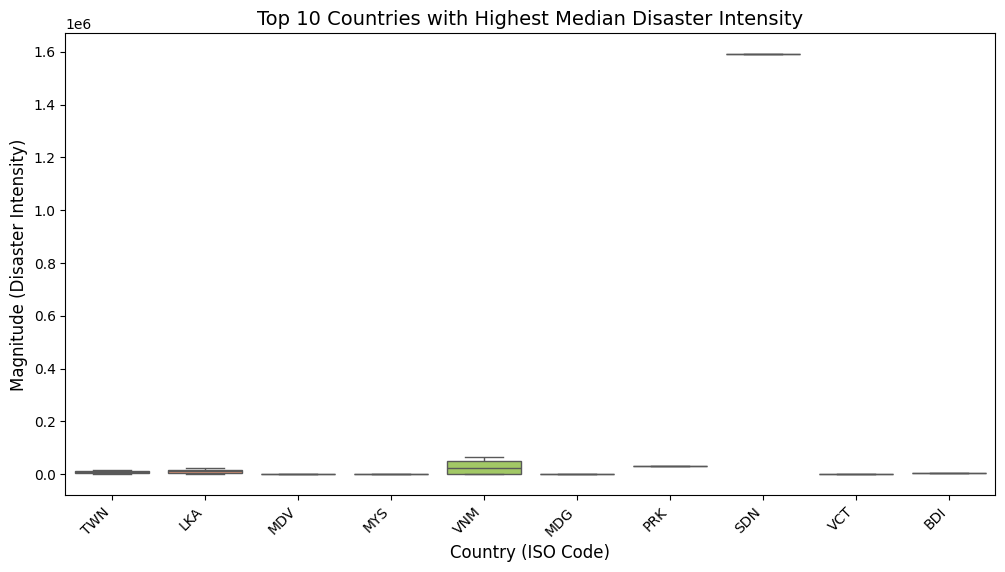

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



top_countries = Natural_Disaster_Impact_df.groupby('ISO')['Magnitude'].median().nlargest(10).index
filtered_top_df = Natural_Disaster_Impact_df[Natural_Disaster_Impact_df['ISO'].isin(top_countries)]


plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_top_df, x='ISO', y='Magnitude', palette="Set2")


plt.xlabel("Country (ISO Code)", fontsize=12)
plt.ylabel("Magnitude (Disaster Intensity)", fontsize=12)
plt.title("Top 10 Countries with Highest Median Disaster Intensity", fontsize=14)


plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()


**Disaster Intensity Across Regions**

This analysis shows the top 10 countries with the highest disaster intensity. The chart helps identify which regions experience the strongest disasters. Some countries have consistently high disaster magnitudes, while others show more variation. Extreme disasters appear as outliers in the data, highlighting areas that may need better disaster preparedness.

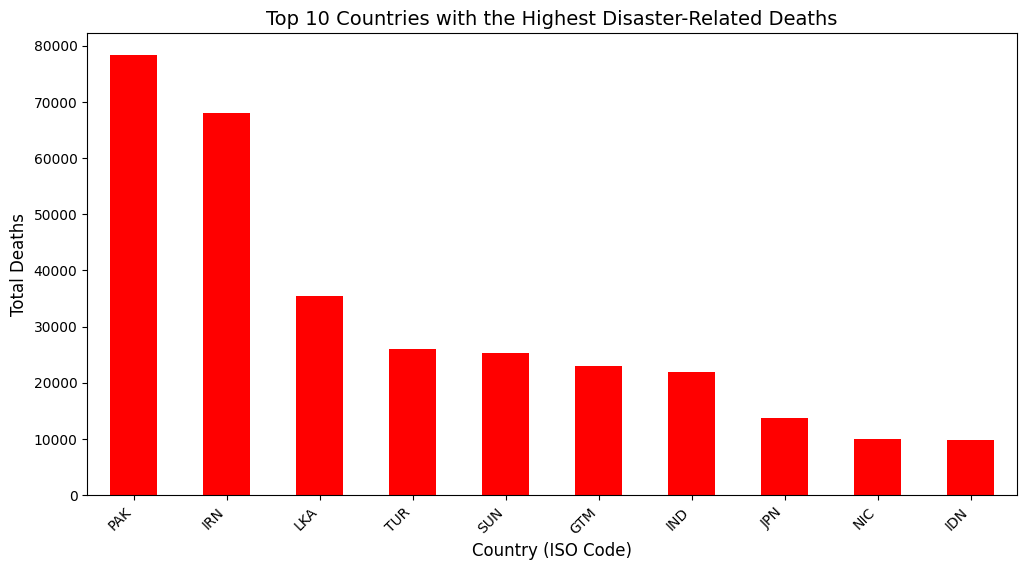

In [ ]:
top_death_countries = Natural_Disaster_Impact_df.groupby('ISO')['Total Deaths'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_death_countries.plot(kind='bar', color='red')

plt.xlabel("Country (ISO Code)", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.title("Top 10 Countries with the Highest Disaster-Related Deaths", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()


**Countries with the Highest Disaster-Related Deaths**

This chart shows the top 10 countries with the highest number of deaths caused by natural disasters. Some countries experience more fatalities due to factors like high disaster frequency, population density, and infrastructure quality. This helps identify regions that may need better disaster preparedness and response systems.

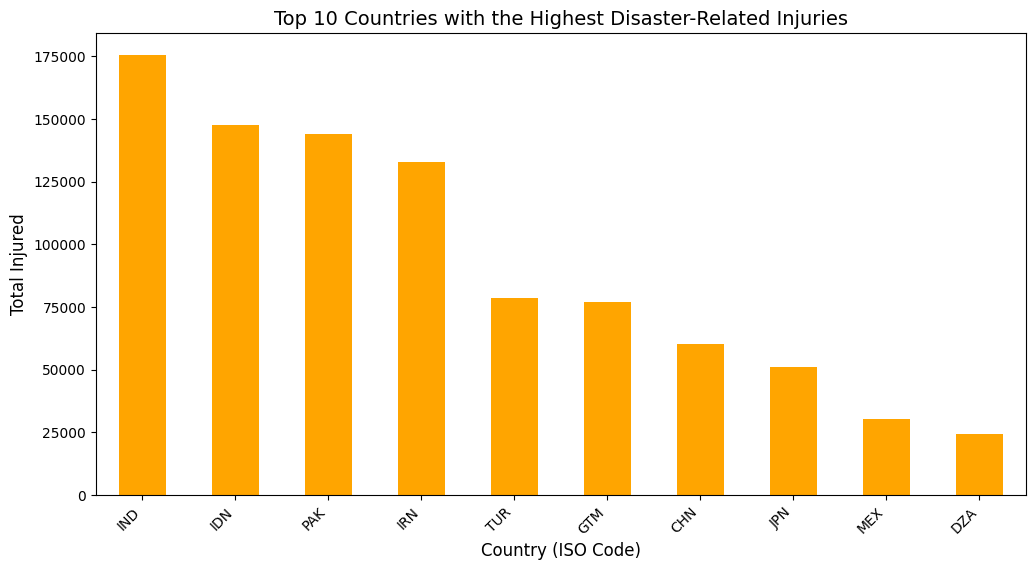

In [ ]:
top_injured_countries = Natural_Disaster_Impact_df.groupby('ISO')['No. Injured'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_injured_countries.plot(kind='bar', color='orange')

plt.xlabel("Country (ISO Code)", fontsize=12)
plt.ylabel("Total Injured", fontsize=12)
plt.title("Top 10 Countries with the Highest Disaster-Related Injuries", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()


**Countries with the Highest Disaster-Related Injuries**

This chart shows the top 10 countries with the highest number of injuries caused by natural disasters. Some countries experience more injuries due to factors like disaster severity, population density, and emergency response quality. This helps identify regions where improving medical response and disaster preparedness could reduce the impact of future disasters.

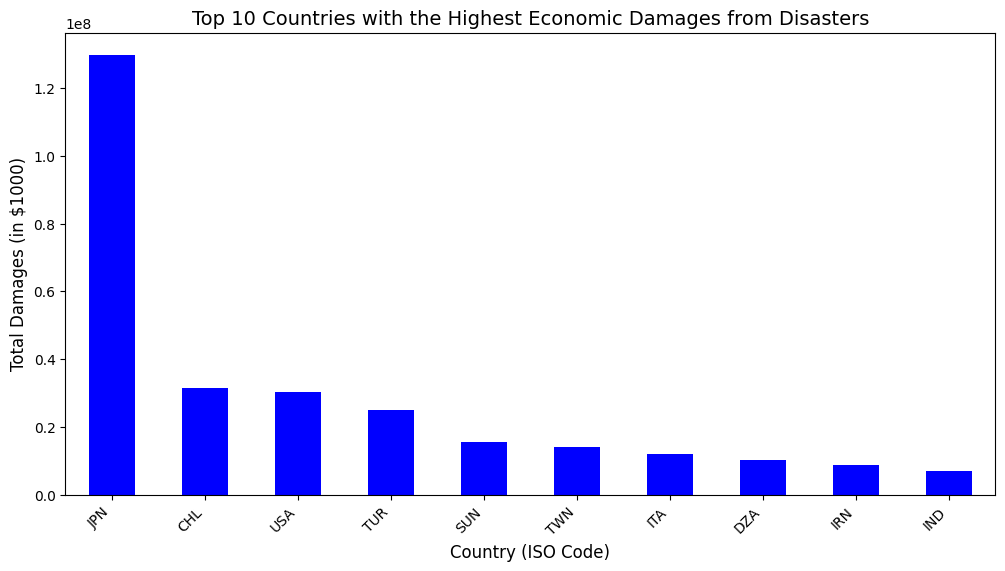

In [ ]:
top_damage_countries = Natural_Disaster_Impact_df.groupby('ISO')["Total Damages ('000 US$)"].sum().nlargest(10)

plt.figure(figsize=(12, 6))
top_damage_countries.plot(kind='bar', color='blue')

plt.xlabel("Country (ISO Code)", fontsize=12)
plt.ylabel("Total Damages (in $1000)", fontsize=12)
plt.title("Top 10 Countries with the Highest Economic Damages from Disasters", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.show()


**Countries with the Highest Economic Damages from Disasters**

This chart shows the top 10 countries with the highest economic losses due to natural disasters. Some countries experience more financial damage due to factors like frequent disasters, high infrastructure costs, and economic size. Understanding these losses helps in disaster risk management and improving financial resilience. 

## 2. Disaster Types and Regions

### Data Cleaning and Exploration for Disaster Impact by Region

In this code segment, we focus on exploring the question: **"Which regions are affected by specific types of natural disasters?"** To address this, we perform data cleaning and selection. First, we load the integrated dataset from a CSV file, then select the relevant columns that contain information about the **disaster group**, **subgroup**, **type**, **ISO (country code)**, and the **start and end years and months** of the disaster event. 

We also drop rows with missing values (null values) to ensure that our analysis is based on complete data. Finally, the cleaned dataset is saved to a new CSV file for further exploration. This step prepares the dataset for more detailed analysis, helping to identify which regions experience specific types of disasters.



In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Datasets/integrated.csv")

# Select specific columns related to natural disasters and drop rows with null values
selected_df = df[['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'ISO', 'Start Year', 'Start Month', 'End Year', 'End Month']]

# Filter for natural disasters only 
selected_df = selected_df[selected_df['Disaster Group'] == 'Natural'].dropna()

# Save the cleaned DataFrame to a new CSV file
selected_df.to_csv("Datasets/Regions.csv", index=False)


In [ ]:
import pandas as pd

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Find duplicate rows for inspection (optional, remove if not needed)
duplicates = regions_df[regions_df.duplicated()]
print(duplicates)

# Remove duplicate rows
regions_df = regions_df.drop_duplicates()

# Save the cleaned DataFrame to the same CSV file, effectively overwriting the original data
regions_df.to_csv("Datasets/Regions.csv", index=False)


      Disaster Group Disaster Subgroup Disaster Type  ISO  Start Year  \
6            Natural       Geophysical    Earthquake  ETH        2025   
7            Natural       Geophysical    Earthquake  IDN        2025   
9            Natural       Geophysical    Earthquake  GRC        2025   
15           Natural    Climatological      Wildfire  AUS        2025   
19           Natural    Climatological      Wildfire  CAF        2025   
...              ...               ...           ...  ...         ...   
25425        Natural    Meteorological         Storm  PHL        2024   
25444        Natural    Meteorological         Storm  MEX        2024   
25447        Natural    Meteorological         Storm  TWN        2024   
25457        Natural    Meteorological         Storm  PHL        2024   
25463        Natural    Meteorological         Storm  PHL        2024   

       Start Month  End Year  End Month  
6              2.0      2025        2.0  
7              2.0      2025        2.0


In this code segment, the dataset is filtered to focus specifically on **natural disasters**. The filtering is done by selecting only the rows where the **Disaster Group** column has the value `'Natural'`. This ensures that the analysis will exclusively include data related to natural disasters, excluding other types such as technological disasters. The rest of the dataset is cleaned by removing rows with missing values, and the resulting data is saved for further analysis.


In [ ]:
import pandas as pd

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Print column names to check the correct column identifiers
print("Columns in the DataFrame:", regions_df.columns)

# Remove duplicate rows for inspection
regions_df = regions_df.drop_duplicates()

# Assuming the column names have been verified and corrected if necessary
try:
    # Aggregate the data to count occurrences of each disaster type in each region
    disaster_counts = regions_df.groupby(['ISO', 'Disaster Group']).size().reset_index(name='Counts')
    
    # Sort the results to find the most frequent disaster type per region
    sorted_disasters = disaster_counts.sort_values(by=['ISO', 'Counts'], ascending=[True, False])
    
    # Extract the most frequent disaster type for each region
    most_frequent_disasters = sorted_disasters.drop_duplicates(subset='ISO')

    # Save the result to a new CSV file
    most_frequent_disasters.to_csv('Datasets/Most_Frequent_Disasters.csv', index=False)

    # Optionally, print the result to see what it looks like
    print(most_frequent_disasters)
except KeyError as e:
    print(f"KeyError: Check if the column name {e} exists in your DataFrame.")


Columns in the DataFrame: Index(['Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'ISO',
       'Start Year', 'Start Month', 'End Year', 'End Month'],
      dtype='object')
     ISO Disaster Group  Counts
0    AFG        Natural     217
1    AGO        Natural      70
2    AIA        Natural      13
3    ALB        Natural      49
4    ANT        Natural       4
..   ...            ...     ...
227  YMN        Natural       6
228  YUG        Natural      21
229  ZAF        Natural     123
230  ZMB        Natural      50
231  ZWE        Natural      52

[232 rows x 3 columns]


In [ ]:
pip install matplotlib seaborn pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


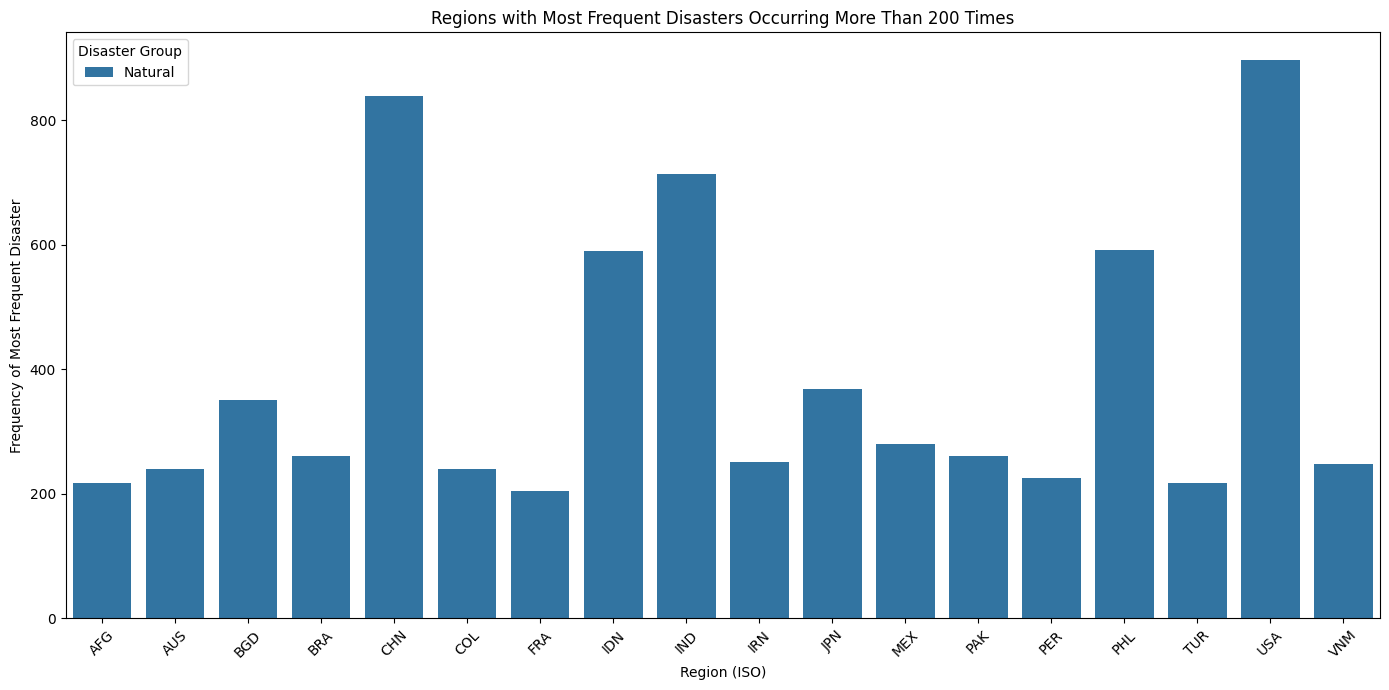

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of each disaster type in each region
disaster_counts = regions_df.groupby(['ISO', 'Disaster Group']).size().reset_index(name='Counts')

# Sort the results to find the most frequent disaster type per region
sorted_disasters = disaster_counts.sort_values(by=['ISO', 'Counts'], ascending=[True, False])

# Find the most frequent disaster type for each region
most_frequent_disasters = sorted_disasters.drop_duplicates(subset='ISO')

# Filter to include only entries with Counts over 200
high_impact_disasters = most_frequent_disasters[most_frequent_disasters['Counts'] > 200]

# Visualization: Create a bar chart
plt.figure(figsize=(14, 7))  # Set the figure size
sns.barplot(data=high_impact_disasters, x='ISO', y='Counts', hue='Disaster Group', dodge=False)
plt.title('Regions with Most Frequent Disasters Occurring More Than 200 Times')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Region (ISO)')  # X-axis label
plt.ylabel('Frequency of Most Frequent Disaster')  # Y-axis label
plt.legend(title='Disaster Group')  # Add legend with a title
plt.tight_layout()  # Adjust subplots to give some padding

# Save the plot as a PNG file
plt.savefig('EDA/High_Impact_Disasters.png')

# Show the plot
plt.show()


The data reveals regions that have recorded over **200 natural disaster occurrences**. The data shows that both the **USA** and **China** have recorded over **800 natural disaster occurrences**. This could reflect both the high frequency of disasters in these regions as well as the possibility of **more comprehensive disaster recording systems** in place. In contrast, other countries with fewer recorded events may have experienced disasters that were not as thoroughly documented or reported, potentially indicating gaps in disaster tracking and data collection in those regions.



 





/tmp/ipykernel_41635/2688082186.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_subgroup_frequency, x='Disaster Subgroup', y='Counts', palette='viridis')


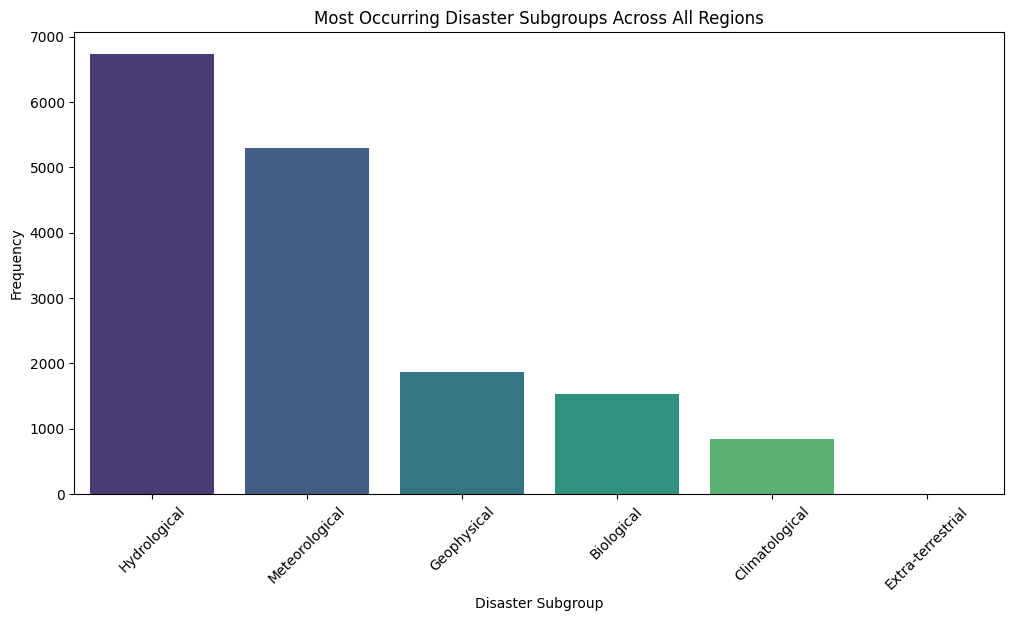

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of each disaster subgroup across all regions
disaster_subgroup_frequency = regions_df.groupby('Disaster Subgroup').size().reset_index(name='Counts')

# Sort the results to find the most frequent disaster subgroups
sorted_subgroup_frequency = disaster_subgroup_frequency.sort_values(by='Counts', ascending=False)

# Visualization: Create a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=sorted_subgroup_frequency, x='Disaster Subgroup', y='Counts', palette='viridis')
plt.title('Most Occurring Disaster Subgroups Across All Regions')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.xlabel('Disaster Subgroup')  # X-axis label
plt.ylabel('Frequency')  # Y-axis label

# Save the plot as a PNG file
plt.savefig('EDA/Most_Occurring_Disaster_Subgroups.png')

# Show the plot
plt.show()


/tmp/ipykernel_41635/3902135146.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_type_frequency, x='Disaster Type', y='Counts', palette='viridis')


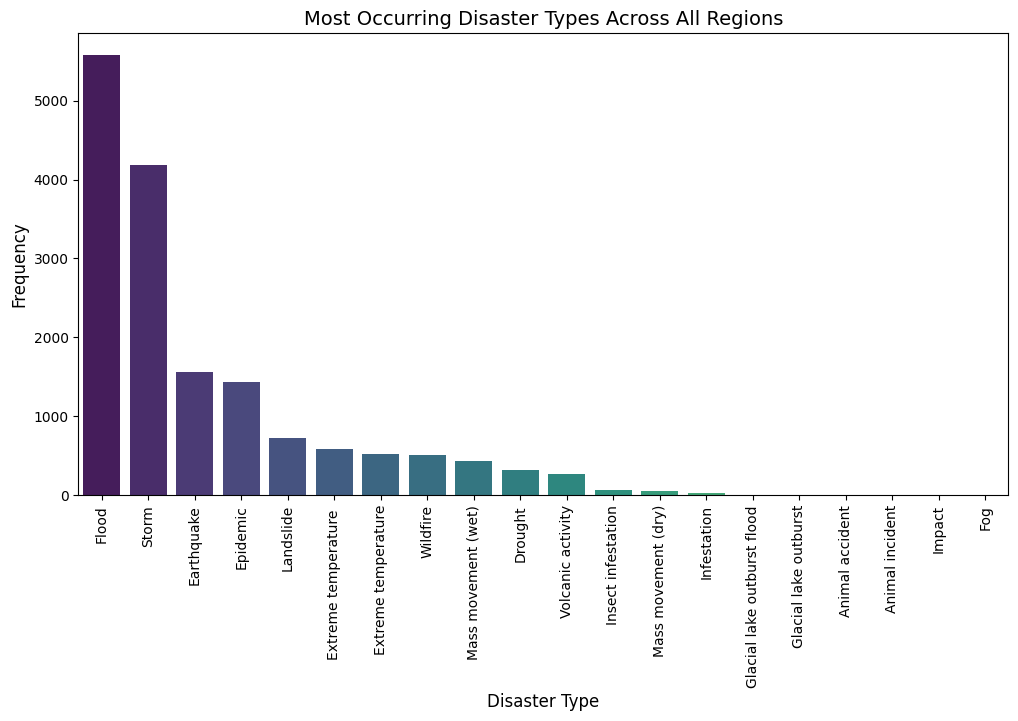

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of each disaster type across all regions
disaster_type_frequency = regions_df.groupby('Disaster Type').size().reset_index(name='Counts')

# Sort the results to find the most frequent disaster types
sorted_type_frequency = disaster_type_frequency.sort_values(by='Counts', ascending=False)

# Visualization: Create a bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(data=sorted_type_frequency, x='Disaster Type', y='Counts', palette='viridis')

# Decrease font sizes
plt.title('Most Occurring Disaster Types Across All Regions', fontsize=14)  # Smaller title font size
plt.xticks(rotation=90, fontsize=10)  # Smaller tick font size for x-axis
plt.yticks(fontsize=10)  # Smaller tick font size for y-axis
plt.xlabel('Disaster Type', fontsize=12)  # Smaller label font size for x-axis
plt.ylabel('Frequency', fontsize=12)  # Smaller label font size for y-axis

# Save the plot as a PNG file
plt.savefig('EDA/Most_Occurring_Disaster_Types.png')

# Show the plot
plt.show()


The bar chart displays the frequency of different disaster types across all regions. The data shows that **floods** are the most common type of disaster, followed by **storms** and **earthquakes**. This trend highlights the widespread impact of flooding in many regions and suggests that storm-related events and seismic activities are also significant contributors to disaster occurrences. Understanding the frequency of these disasters can help prioritize preparedness and response strategies for the most common events.





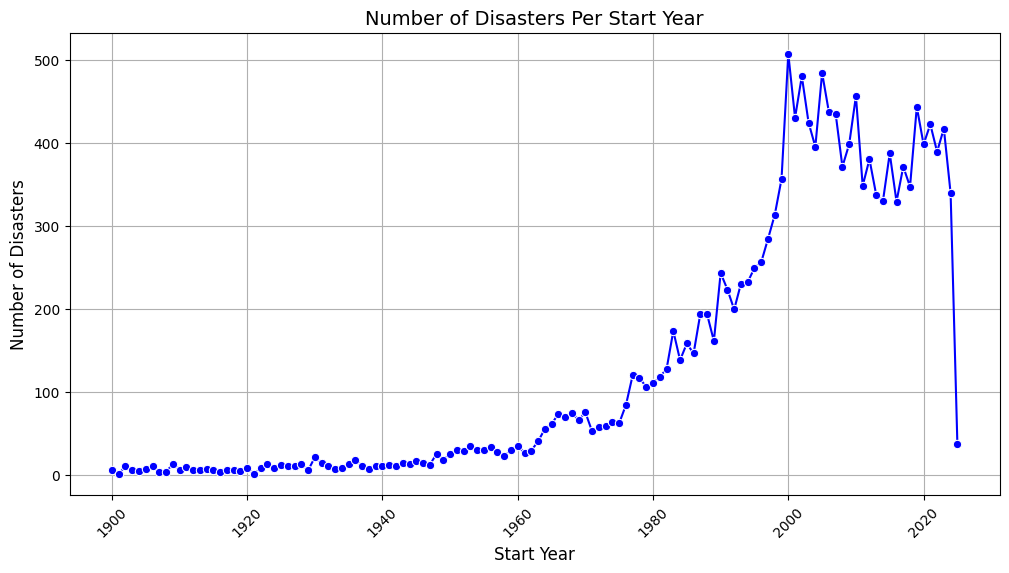

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that matplotlib can display charts directly in your Jupyter notebook
%matplotlib inline

# Read the CSV file
regions_df = pd.read_csv("Datasets/Regions.csv")

# Remove duplicate rows to ensure accurate counts
regions_df = regions_df.drop_duplicates()

# Aggregate the data to count occurrences of disasters each year using the 'Start Year' column
disaster_by_start_year = regions_df.groupby('Start Year').size().reset_index(name='Counts')

# Sort the results by year (if not already sorted)
disaster_by_start_year.sort_values('Start Year', inplace=True)

# Visualization: Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=disaster_by_start_year, x='Start Year', y='Counts', marker='o', color='b')  # 'o' marker adds dots at each data point

plt.title('Number of Disasters Per Start Year', fontsize=14)
plt.xlabel('Start Year', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Optionally, you can adjust grid lines for better visual comparison
plt.grid(True)

# Save the plot as a PNG file
plt.savefig('EDA/Disaster_Frequency_By_Start_Year.png')

# Show the plot
plt.show()


This chart visualizes the number of natural disasters recorded each year, with a clear focus on the 2000s. The observed spike in disasters starting from the early 2000s suggests that disasters from earlier years may not have been fully recorded or documented, possibly due to limited data availability, underreporting, or lack of technological infrastructure for disaster tracking in the past. This trend highlights the importance of considering data completeness when analyzing historical disaster trends.





## 3. Losses Associated with Disasters

This code segment focuses on analyzing the **losses** associated with natural disasters, with a primary emphasis on **total damages** (denoted in USD). The analysis takes into account all available columns, as understanding the effects of other factors, such as disaster type, region, and date, is essential for a comprehensive view of the disaster's impact. The data is cleaned by removing duplicate rows and dropping any rows with null values to ensure that the analysis is based on complete, accurate records. The cleaned data is then saved to a new CSV file for further analysis of the losses associated with these events.





In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("Datasets/integrated.csv")

# Drop duplicate rows
df = df.drop_duplicates()

# Drop rows with any null values
df = df.dropna()

# Save the cleaned data to a new CSV file
df.to_csv("Datasets/losses.csv", index=False)


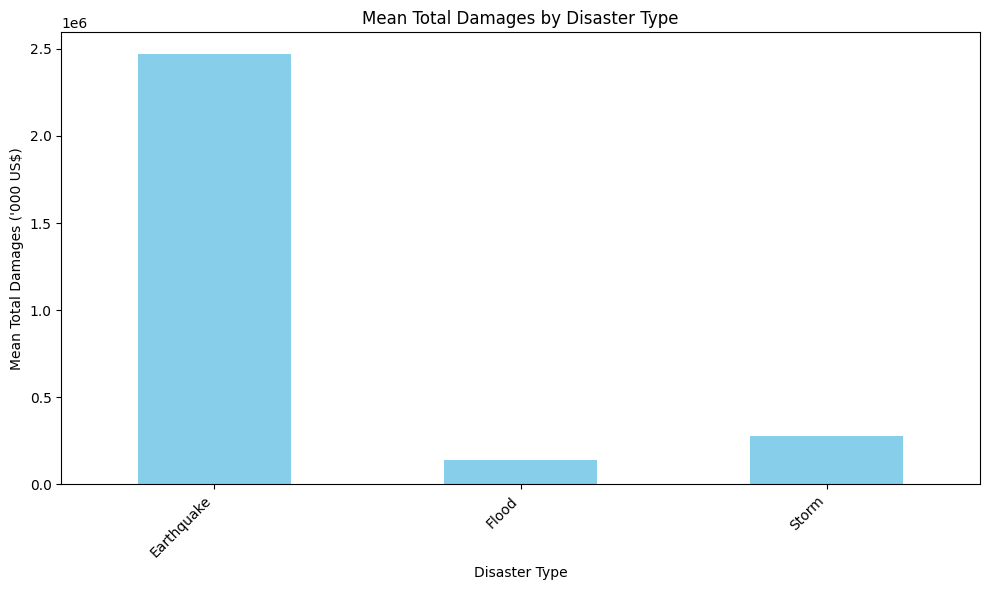

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Datasets/losses.csv")

# Group by 'Disaster Type' and calculate the mean of 'Total Damages ('000 US$)'
mean_damages = df.groupby('Disaster Type')['Total Damages (\'000 US$)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
mean_damages.plot(kind='bar', color='skyblue')
plt.title('Mean Total Damages by Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Mean Total Damages (\'000 US$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('EDA/mean_total_damages.png')
plt.show()


This bar chart illustrates the mean total damages (in thousands of US dollars) for each disaster type. It is evident that **earthquakes** account for the largest share of total damages, with a significantly higher mean compared to **floods** and **storms**. The disparity suggests that earthquakes tend to cause far greater economic losses, likely due to the scale of destruction they cause. On the other hand, floods and storms have comparatively lower mean damages, indicating a potentially less severe financial impact per event, though they may still result in widespread effects across multiple regions.





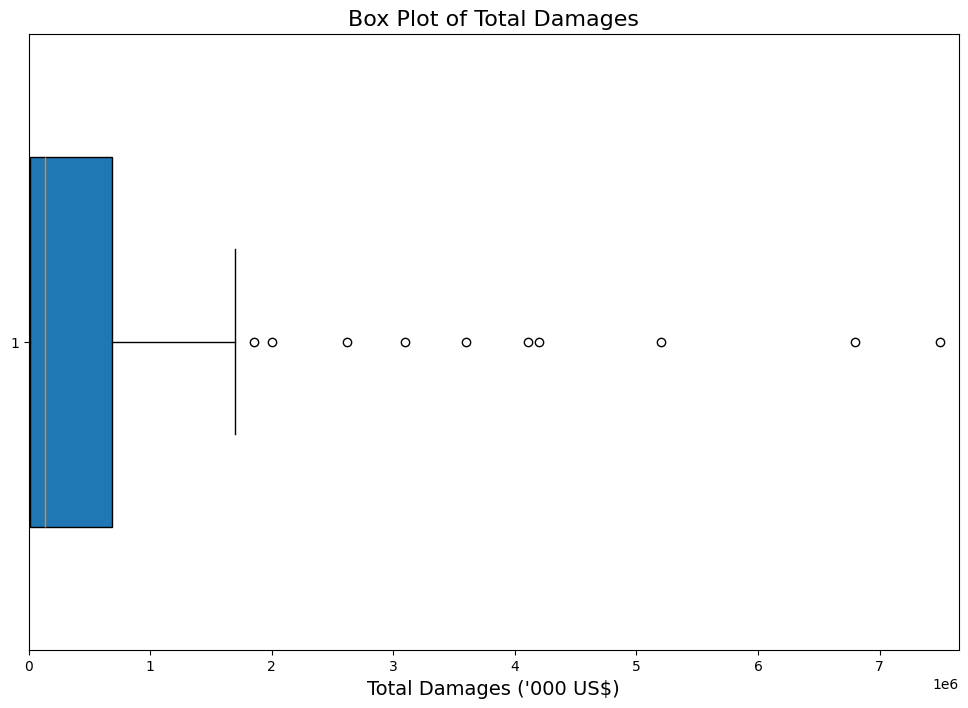

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Datasets/losses.csv")

# Plotting the box plot for 'Total Damages ('000 US$)'
plt.figure(figsize=(12, 8))  # Increased figure size for better clarity
plt.boxplot(df['Total Damages (\'000 US$)'].dropna(), vert=False, widths=0.6, patch_artist=True)
plt.title('Box Plot of Total Damages', fontsize=16)
plt.xlabel('Total Damages (\'000 US$)', fontsize=14)

# Setting x-axis limits to improve focus on the data range
plt.xlim([0, df['Total Damages (\'000 US$)'].quantile(0.95)])  # Adjusting x-axis to exclude extreme outliers

# Save the plot with higher resolution
plt.savefig('EDA/total_damages_boxplot.png', dpi=300)
plt.show()


This box plot displays the distribution of **total damages** (in thousands of US dollars) across all natural disaster events. The plot shows a significant concentration of damages around the lower end of the range, with a few extreme outliers on the higher end. These outliers represent extreme disaster events with very high damage costs. The box itself captures the interquartile range (IQR), with the median damage value marked inside the box. This visualization highlights the presence of extreme values and the skewness in the damage distribution, where a few events cause substantial financial losses.





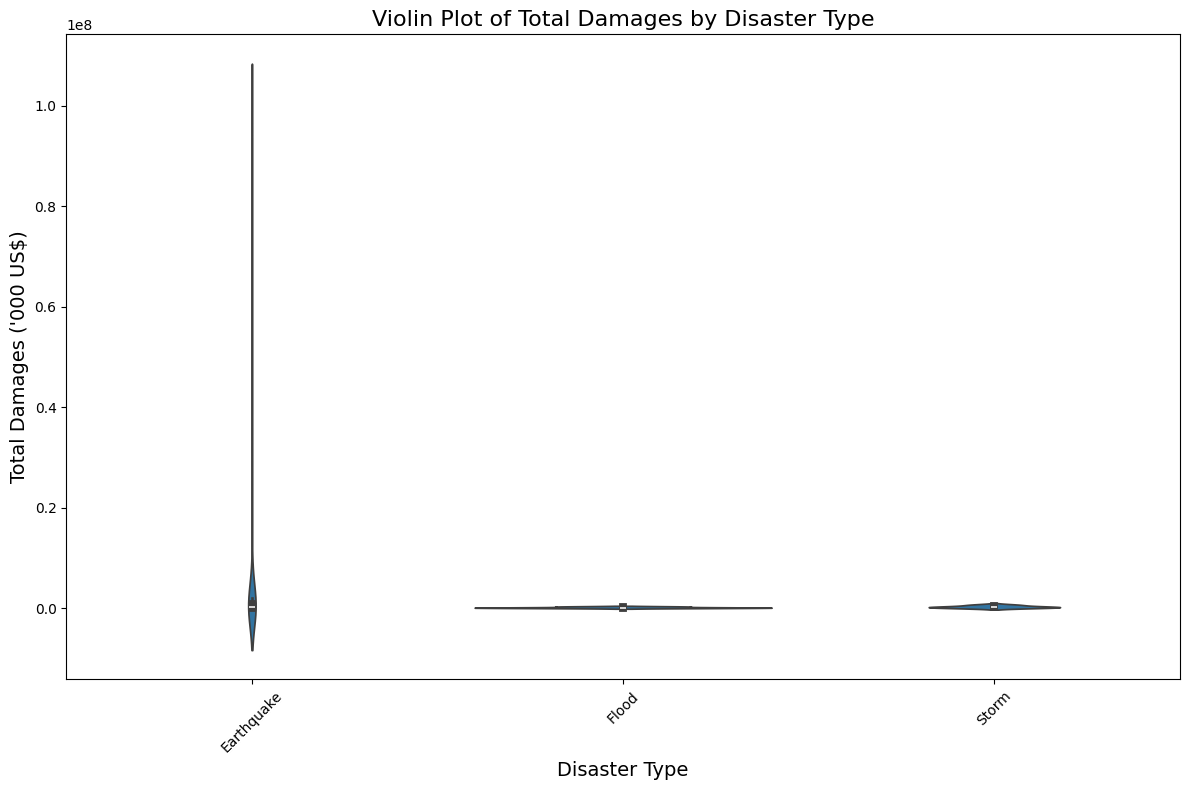

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Datasets/losses.csv")

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Disaster Type', y='Total Damages (\'000 US$)', data=df)
plt.title('Violin Plot of Total Damages by Disaster Type', fontsize=16)
plt.xlabel('Disaster Type', fontsize=14)
plt.ylabel('Total Damages (\'000 US$)', fontsize=14)
plt.xticks(rotation=45)  # Rotate labels to make them readable
plt.tight_layout()

# Save the plot
plt.savefig('EDA/violindamages_by_disaster.png', dpi=300)
plt.show()


This violin plot provides a detailed view of the distribution of **total damages** (in USD) across different disaster types. It shows that **earthquakes** have a wide range of damages, with a significant portion of the data concentrated at very high values. In contrast, the **flood** and **storm** categories exhibit much narrower distributions, with most of the data clustered around lower damage amounts. The plot emphasizes the extreme financial impact that earthquakes can have compared to floods and storms, which tend to cause relatively lower damages in comparison.





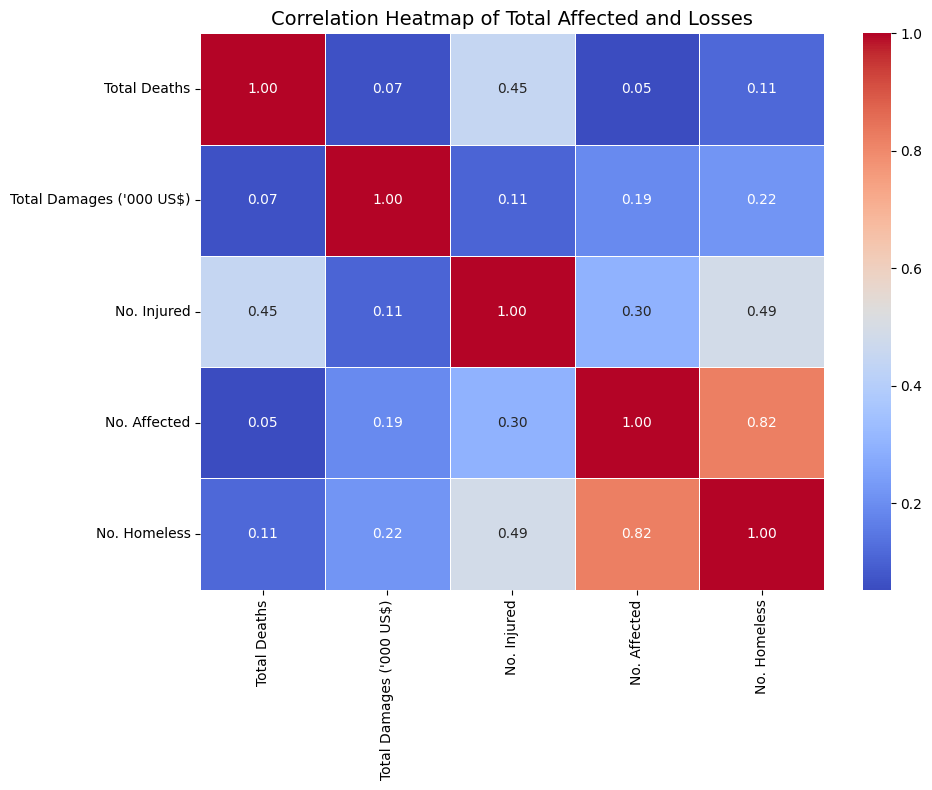

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv("Datasets/integrated.csv")

# Drop duplicate rows and rows with null values
df = df.drop_duplicates()
df = df.dropna(subset=['Total Deaths', 'Total Damages (\'000 US$)', 'No. Injured', 'No. Affected', 'No. Homeless'])

# Select relevant columns for correlation analysis
selected_df = df[['Total Deaths', 'Total Damages (\'000 US$)', 'No. Injured', 'No. Affected', 'No. Homeless']]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add title and labels
plt.title('Correlation Heatmap of Total Affected and Losses', fontsize=14)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('EDA/Correlation_Heatmap_Total_Affected_and_Damages.png')

# Show the plot
plt.show()


This code segment focuses on analyzing the correlation between **Total Affected** and **Total Damages ('000 US$')**, along with other related disaster metrics such as **Total Deaths**, **No. Injured**, and **No. Homeless**.


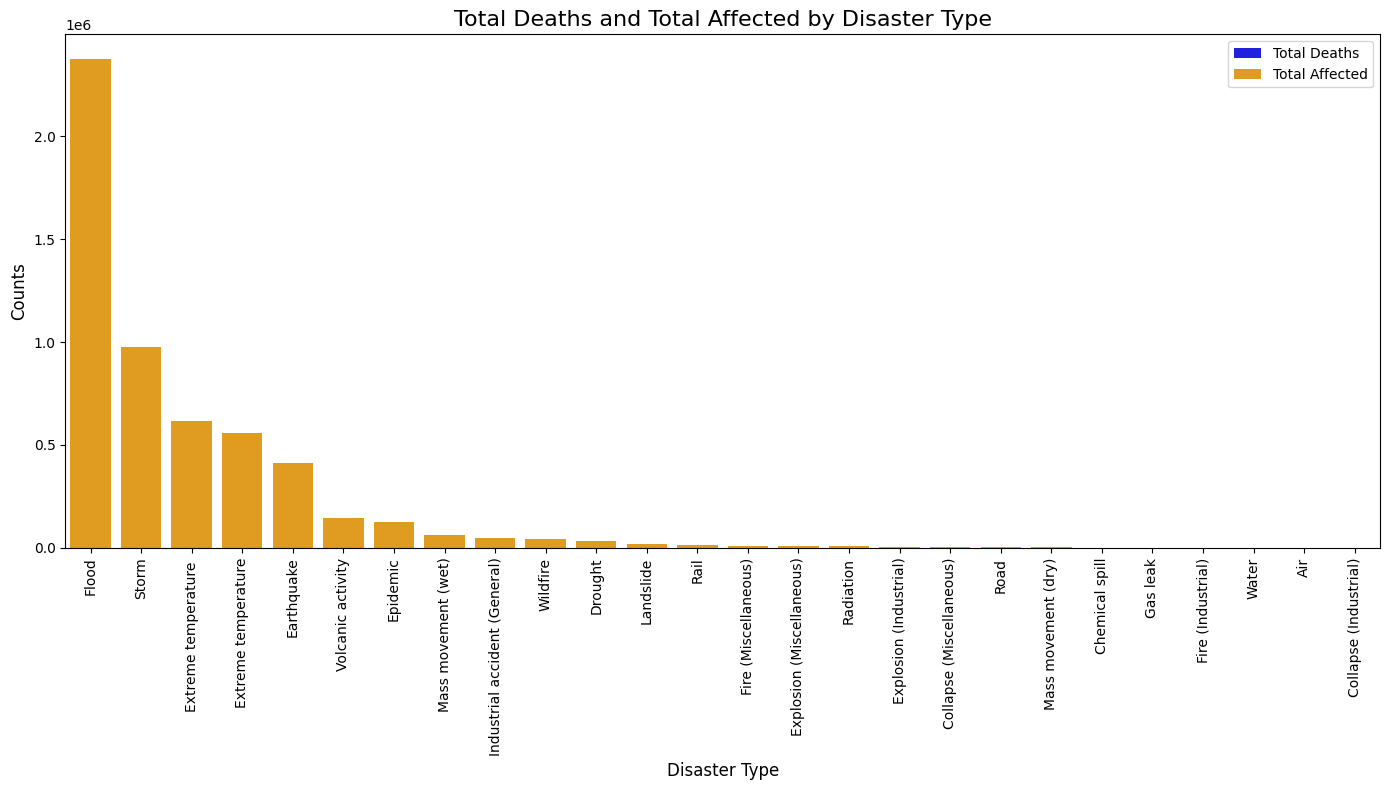

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv("Datasets/integrated.csv")

# Drop duplicate rows and rows with null values for relevant columns
df = df.drop_duplicates()
df = df.dropna(subset=['Total Deaths', 'No. Injured', 'No. Affected', 'Total Affected', 'Disaster Type'])

# Calculate the mean Total Deaths and mean Total Affected by Disaster Type
disaster_summary = df.groupby('Disaster Type')[['Total Deaths', 'Total Affected']].mean().reset_index()

# Sort the results to show the disaster types with the highest average impacts
disaster_summary = disaster_summary.sort_values(by='Total Affected', ascending=False)

# Create a bar plot for Total Deaths and Total Affected by Disaster Type
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the Total Deaths
sns.barplot(data=disaster_summary, x='Disaster Type', y='Total Deaths', color='blue', label='Total Deaths')

# Plot the Total Affected (on the same plot, with a different color)
sns.barplot(data=disaster_summary, x='Disaster Type', y='Total Affected', color='orange', label='Total Affected')

# Add titles and labels
plt.title('Total Deaths and Total Affected by Disaster Type', fontsize=16)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

# Add a legend to differentiate the bars
plt.legend()

# Save the plot as a PNG file
plt.tight_layout()
plt.savefig('EDA/Total_Deaths_and_Affected_By_Disaster_Type.png')

# Show the plot
plt.show()


This visualizes the severity of different disaster types in terms of both human casualties (Total Deaths) and the number of affected individuals (Total Affected). It highlights which disasters, such as earthquakes, floods, or storms, result in the most widespread and severe consequences, both in terms of lives lost and people affected.

## 4. Earthquake Risk by Region

In this analysis, we aim to explore **which regions have a greater likelihood of experiencing earthquakes**. By analyzing past earthquake occurrences, we will identify high-risk areas based on:

- **Earthquake frequency** (how often earthquakes occur in different regions).
- **Earthquake severity** (magnitude distribution across regions).
- **Human impact** (total affected population and deaths).
- **Geographic hotspots** (spatial distribution of earthquakes on a map).

### Dataset Observations:
- The dataset includes details such as latitude, longitude, magnitude, total affected population, and total deaths.

- There are missing values, particularly in latitude, longitude, and magnitude, which are essential for location-based analysis.

- The dataset contains various disaster types, so filtering for earthquakes is necessary.

Our dataset contains 32,319 entries with 20 columns, covering various disaster types, locations, and impacts. Since we are specifically interested in earthquakes, we will extract and analyze relevant earthquake-related data.

We will start by extracting relevant features from the dataset (integrated.csv). Then, we will perform EDA.

In [ ]:
import pandas as pd

df4 = pd.read_csv("Datasets/integrated.csv")

### Dataset Cleaning and Feature Selection:

To focus on earthquake-related insights, we will be selecting the following features:

- **Latitude & Longitude** (for location-based analysis)
- **ISO** (Country Code)
- **Start Year** (to observe trends over time)
- **Magnitude** (to assess earthquake severity)
- **Total Deaths & Total Affected** (to evaluate human impact)

We will also:

- Filter for earthquake occurrences.
- Remove any outliers in Latitude and Longitude.
- Drop rows with missing location data (since location is crucial for regional analysis).
- Unify Magnitude Measurement (we will be converting different scales to Moment Magnitude Scale (Mw)).

#### **To Remove Outliers in Latitude and Longitude**
We will check if values go beyond valid ranges:

- Latitude should be between -90 and 90.
- Longitude should be between -180 and 180.

#### **Unifying Magnitude Scales**

In our original dataset magnitude was reported in different scales:

1. **Moment Magnitude Scale (Mw)** (standard)
2. **Richter Scale (ML)**
3. **Body Wave Magnitude (Mb)**
4. **Surface Wave Magnitude (Ms)**

To ensure consistency, we convert all scales to Moment Magnitude (Mw) using the following empirical formulas:

- **Richter to Mw**:  Mw = 0.67 × ML + 2.07

- **Body Wave to Mw**:  Mw = 0.85 × Mb + 1.03

- **Surface Wave to Mw**:  Mw = 0.67 × Ms + 2.07

In [ ]:
# Filter dataset for Earthquakes only
earthquake_df = df4[df4["Disaster Type"] == "Earthquake"].copy()

# Selecting relevant columns
selected_columns = ["ISO", "Latitude", "Longitude", "Start Year", "Magnitude", "Magnitude Scale", "Total Deaths", "Total Affected"]
earthquake_df = earthquake_df[selected_columns]

# Convert Latitude and Longitude to numeric
earthquake_df["Latitude"] = pd.to_numeric(earthquake_df["Latitude"], errors="coerce")
earthquake_df["Longitude"] = pd.to_numeric(earthquake_df["Longitude"], errors="coerce")

# Drop rows where Latitude or Longitude is missing
earthquake_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Remove invalid latitude/longitude values
earthquake_df = earthquake_df[
    (earthquake_df["Latitude"].between(-90, 90)) &
    (earthquake_df["Longitude"].between(-180, 180))
]

# Define a function to convert different magnitude scales to Moment Magnitude (Mw)
def convert_to_mw(row):
    scale = row["Magnitude Scale"]
    mag = row["Magnitude"]
    
    if pd.isna(scale) or pd.isna(mag):
        return None  # Keep NaN values

    if scale == "M":  # Already in Mw
        return mag
    elif scale == "ML":  # Richter Scale to Mw
        return 0.67 * mag + 2.07
    elif scale == "Mb":  # Body Wave to Mw
        return 0.85 * mag + 1.03
    elif scale == "Ms":  # Surface Wave to Mw
        return 0.67 * mag + 2.07
    else:
        return None  # Ignore non-earthquake scales

# Apply conversion function
earthquake_df["Magnitude (Mw)"] = earthquake_df.apply(convert_to_mw, axis=1)

# Drop the old "Magnitude Scale" column
earthquake_df.drop(columns=["Magnitude Scale"], inplace=True)

# Save the cleaned dataset
cleaned_file_path = "Datasets/Earthquake.csv"
earthquake_df.to_csv(cleaned_file_path, index=False)


- Relevant Features are extracted.
- Magnitude scales are now standardized to Moment Magnitude (Mw).
- Non-earthquake magnitude scales (like km/h for storms) were removed.
- Outliers in Longitude and Magnitude are removed.

Now the cleaned dataset is ready for EDA.

### Data Visualization:
We will now analyze **earthquake trends** using different types of visualizations.

In [ ]:
pip install geopandas cartopy matplotlib pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### 1. **Map Visualization:** Earthquake Locations
A map visualization will help us see where earthquakes have occurred globally.

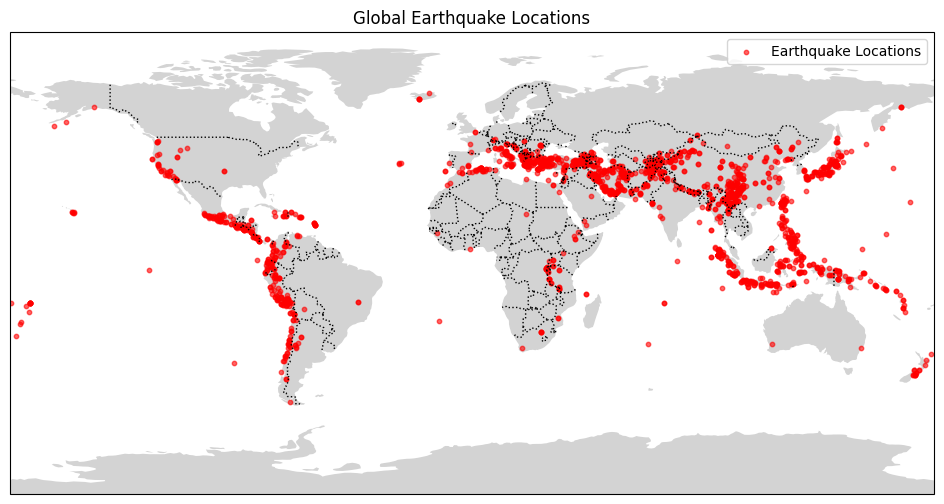

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the cleaned earthquake dataset
file_path = "Datasets/Earthquake.csv"  # Make sure the file path is correct
earthquake_df = pd.read_csv(file_path)

# Convert Latitude and Longitude to numeric (if not already done)
earthquake_df["Latitude"] = pd.to_numeric(earthquake_df["Latitude"], errors="coerce")
earthquake_df["Longitude"] = pd.to_numeric(earthquake_df["Longitude"], errors="coerce")

# Drop missing values
earthquake_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Create a world map with earthquake locations
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':', edgecolor='black')

# Plot earthquake locations as red dots
ax.scatter(
    earthquake_df["Longitude"],
    earthquake_df["Latitude"],
    color="red",
    alpha=0.6,
    s=10,
    transform=ccrs.PlateCarree(),
    label="Earthquake Locations"
)

plt.title("Global Earthquake Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

plt.savefig('EDA/GlobalEarthquakeLocations.png', dpi=300)

##### **World Map Insights:**
1. **Most earthquakes happen along tectonic plate boundaries:**
   - The **Pacific Ring of Fire** (Japan, Indonesia, West Coast of the Americas) is the most active zone.
   - The **Himalayan region** (Nepal, India) and the **Middle East** (Turkey, Iran) also experience frequent quakes.

2. **Some areas have fewer earthquakes:**
   - Regions such as **Central Africa**, **Europe**, and **inland North America** see much less activity because they are far from tectonic plate edges.

3. **A few earthquakes occur in unexpected places:**
   - Some quakes happen away from known fault lines (e.g., central USA, parts of Africa), likely due to deep underground stress.

4. **The Pacific Ring of Fire is the world’s biggest earthquake hotspot:**
   - This area alone accounts for **over 75%** of global earthquakes, often causing strong and destructive events.

#### 2. **Heatmap Visualization:** Earthquake Frequency by Region
A heatmap will help us visualize which areas experience earthquakes most frequently.

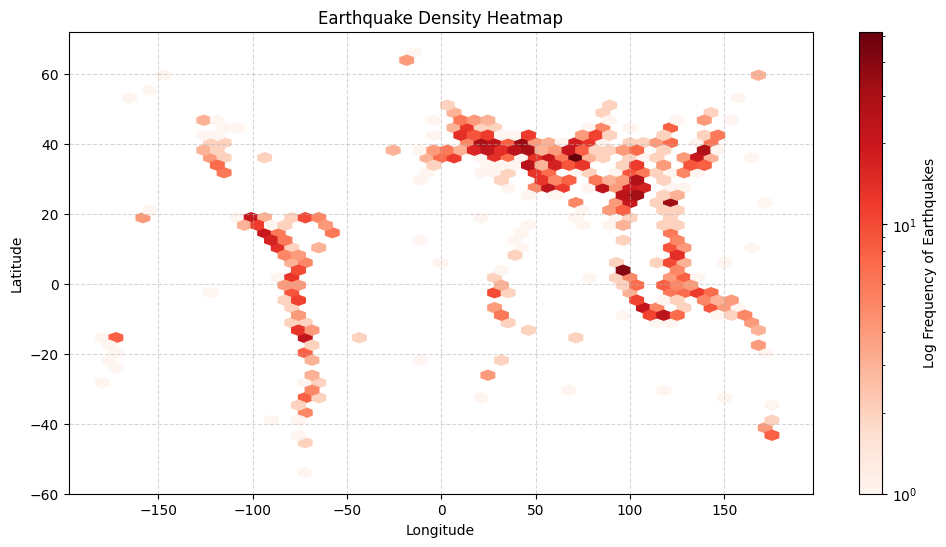

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned earthquake dataset
file_path = "Datasets/Earthquake.csv"  # Ensure the correct file path
earthquake_df = pd.read_csv(file_path)

# Convert Latitude and Longitude to numeric (if not already done)
earthquake_df["Latitude"] = pd.to_numeric(earthquake_df["Latitude"], errors="coerce")
earthquake_df["Longitude"] = pd.to_numeric(earthquake_df["Longitude"], errors="coerce")

# Drop missing values
earthquake_df.dropna(subset=["Latitude", "Longitude"], inplace=True)

# Generate Earthquake Density Heatmap
plt.figure(figsize=(12, 6))
hb = plt.hexbin(
    earthquake_df["Longitude"],
    earthquake_df["Latitude"],
    gridsize=50,
    cmap="Reds",
    bins="log"
)

plt.colorbar(label="Log Frequency of Earthquakes")
plt.title("Earthquake Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
plt.savefig('EDA/EarthquakeDensity.png', dpi=300)

##### **Heatmap Insights:**

1. **Earthquakes are most frequent along tectonic boundaries:**
   - The **Pacific Ring of Fire** (Japan, Indonesia, West Coast of the Americas) is the most active zone.
   - Other hotspots include the **Himalayas** (Nepal, India) and the **Middle East** (Turkey, Iran).

2. **South America and California show high activity:**
   - Strong earthquake clusters appear along the west coasts of North and South America, following major fault lines.

3. **Asia and the Middle East are also highly active:**
   - The **Himalayan collision zone** and **Turkey-Iran fault systems** contribute to frequent seismic events.

4. **Africa and Europe have lower activity:**
   - Some quakes occur along the **East African Rift**, while **Italy**, **Greece**, and **Turkey** are the most active in Europe.

#### 3. **Time-Series Visualization:** Earthquake Frequency Over Time
A time-series plot will help us analyze how earthquake occurrences have changed over the years.

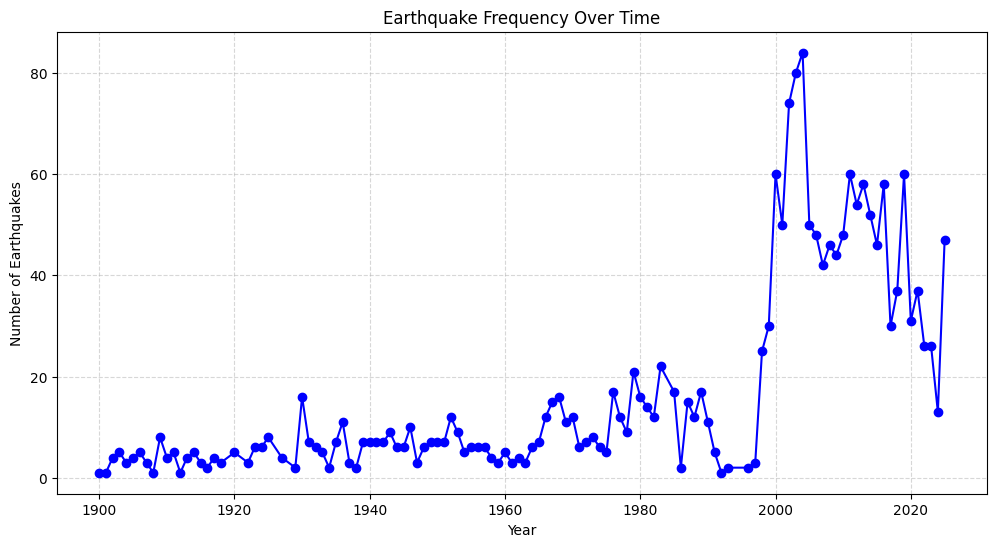

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned earthquake dataset
file_path = "Datasets/Earthquake.csv"  # Ensure the correct file path
earthquake_df = pd.read_csv(file_path)

# Convert 'Start Year' to numeric (ensure proper time-series processing)
earthquake_df["Start Year"] = pd.to_numeric(earthquake_df["Start Year"], errors="coerce")

# Group earthquakes by year to count occurrences
earthquake_trends = earthquake_df["Start Year"].value_counts().sort_index()

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(earthquake_trends.index, earthquake_trends.values, marker="o", linestyle="-", color="blue")
plt.title("Earthquake Frequency Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.grid(True, linestyle="--", alpha=0.5)

# Save the plot
plt.savefig('EDA/EarthquakeTrends.png', dpi=300)
plt.show()


##### **Time-Series Insights:**

1. **Increase in recorded earthquakes over time**
   - From **1900 to the late 20th century**, earthquake occurrences were relatively stable, with minor fluctuations.
   - A sharp increase after the **1990s** suggests improved seismic monitoring technology, rather than an actual increase in earthquakes.

2. **Significant spike in the early 2000s**
   - A sudden surge in earthquake records around **2000-2010** could indicate major global seismic events or improvements in global data collection.

3. **Recent fluctuations in earthquake occurrences**
   - Although the peak earthquake frequency has dropped slightly after **2010**, activity remains higher than in the early 20th century.

4. **Possible explanations for the trend**
   - The increase in recorded earthquakes is likely due to advancements in detection technology and a greater number of seismic stations worldwide.
   - Climate and geological factors may also contribute, but further analysis is needed to confirm any direct correlations.